[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ktehranchi/energy310_notebooks/blob/main/notebooks/04_capacity_expansion_pypsa_usa_example.ipynb)


In [ ]:
# Import necessary libraries
import pypsa
import matplotlib.pyplot as plt
import logging

from helpers import (
    plot_energy_balance,
    plot_capacity_comparison
)

logger = logging.getLogger("gurobipy")
logger.propagate = False

pypsa.__version__

'0.35.2'

In [3]:
network = pypsa.Network('/Users/kamrantehranchi/Local_Documents/energy310_notebooks/data/examples/elec_s380_c7a_ec_lv1.5_RPS-REM-TCT-1h_E.nc')

INFO:pypsa.network.io:New version 1.0.3 available! (Current: 0.35.2)
INFO:pypsa.network.io:Imported network '' has buses, carriers, generators, global_constraints, links, loads, storage_units


$$
\begin{aligned}
\min_{p, s, \bar{p}, \bar{s}, \bar{f}, f}
&\sum_{a \in A} \omega_a \Bigg[ 
\sum_{t \in T^a} \omega_{a,t} \Bigg( 
\sum_{g \in G} o_{g,a,t} \cdot p_{g,a,t} 
\Bigg) \\[0.5em]
& \quad + \sum_{g \in G} c_{g,a} \cdot \bar{p}_{g} 
+ \sum_{s \in S} c_s \cdot \bar{s}_{s} 
+ \sum_{b \in B} c_b \cdot \bar{f}_{b}
\Bigg] \\[0.5em]
\text{subject to:} \quad
&\widetilde{p}_{g,a,t}^{\text{min}} \bar{p}_{g} 
  \leq p_{g,a,t} 
  \leq \widetilde{p}_{g,a,t}^{\text{max}} \bar{p}_{g} 
  && \forall g \in G,\; a \in A,\; t \in T_a \\[0.5em]
& RD_g \leq p_{g,a,t} - p_{g,a,{t-1}} \leq RU_g 
  && \forall g \in G,\; a \in A,\; t \in T_a   \\[0.5em]
& \sum_{g \in G_z} \bar{p}_{g} \leq \bar{p}^{\text{max}}_{g,z} 
  && \forall z \in Z     \\[0.5em]
& 0 \leq SOC_{s,a,t} \leq h_s \bar{s}_{s} 
  && \forall s \in S,\; a \in A,\; t \in T_a    \\[0.5em]
& 0 \leq s_{s,a,t}^{out} \leq \bar{s}_{s} 
  && \forall s \in S,\; a \in A,\; t \in T_a     \\[0.5em]
& 0 \leq s_{s,a,t}^{in} \leq \bar{s}_{s} 
  && \forall s \in S,\; a \in A,\; t \in T_a      \\[0.5em]
& SOC_{s,a,t} = SOC_{s,a,t-1} 
  + \eta^{in} s_{s,a,t}^{in} 
  - \frac{1}{\eta^{out}} s_{s,a,t}^{out} 
  && \forall s \in S,\; a \in A,\; t \in T_a      \\[0.5em]
& \widetilde{f}_{b,a,t}^{\text{min}} \bar{f}_{b} 
  \leq f_{b,a,t} 
  \leq \widetilde{f}_{b,a,t}^{\text{max}} \bar{f}_{b} 
  && \forall b \in B,\; a \in A,\; t \in T_a     \\[0.5em]
& \sum_g p_{g,a,t,n} 
+ \sum_s s_{s,a,t,n}^{out} 
- \sum_s s_{s,a,t,n}^{in} 
- \sum_b K_{b,n} f_{b,a,t}  = D_{a,t,n}  \forall n \in N,\; a \in A,\; t \in T_a
\end{aligned}
$$

In [49]:
network.generators.p_nom_extendable

Generator
p600 0 CCGT existing      False
p600 0 OCGT existing      False
p600 0 oil                False
p600 0 onwind existing    False
p600 0 solar existing     False
                          ...  
p62 hydrogen_ct_2030      False
p63 hydrogen_ct_2030      False
p64 hydrogen_ct_2030      False
p65 hydrogen_ct_2030      False
p67 hydrogen_ct_2030      False
Name: p_nom_extendable, Length: 1355, dtype: bool

<Axes: xlabel='period,timestep'>

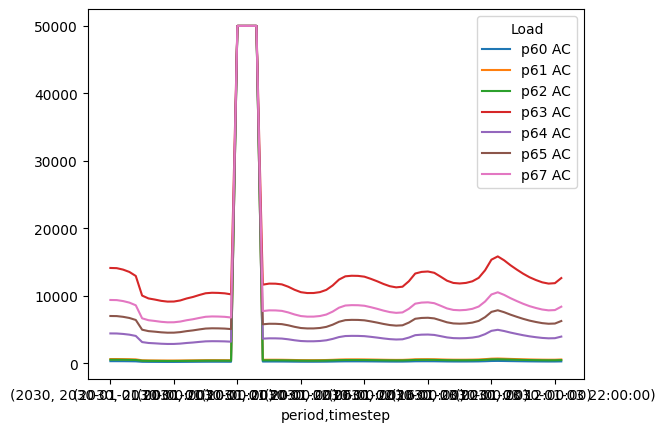

In [51]:
# network.loads_t.p_set /= 0.75
network.loads_t.p_set.iloc[20:24] = 50000 # set arbitrarily large load for 4 hour to show impacts of expansion
network.loads_t.p_set.iloc[:72].plot()


In [52]:
network.links

,bus0,bus1,type,carrier,efficiency,active,build_year,lifetime,p_nom,p_nom_mod,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
p60||p61_fwd,p60,p61,,AC,0.987274,True,0,inf,4270.071,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,4270.071
p60||p62_fwd,p60,p62,,AC,0.993721,True,0,inf,3303.403,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,3303.403
p60||p63_fwd,p60,p63,,AC,0.971904,True,0,inf,10383.198,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,10383.198
p61||p62_fwd,p61,p62,,AC,0.992017,True,0,inf,1522.014,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1522.014
p61||p63_fwd,p61,p63,,AC,0.960224,True,0,inf,3393.601,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,3393.601
p61||p64_fwd,p61,p64,,AC,0.967756,True,0,inf,3008.900,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,3008.900
p61||p65_fwd,p61,p65,,AC,0.970447,True,0,inf,186.352,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,186.352
p63||p64_fwd,p63,p64,,AC,0.978866,True,0,inf,7909.854,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,7909.854
p64||p65_fwd,p64,p65,,AC,0.991812,True,0,inf,6488.427,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,6488.427


In [53]:
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt,vom_cost,fuel_cost,heat_rate,carrier_base,land_region,lcoe
Generator,,,,,,,,,,,,,,,,,,,,,
p600 0 CCGT existing,p60,Slack,,1869.9,0.0,True,0.0,1869.9,0.0,1.0,...,1.0,1.0,12.000000,1869.9,2.04,2.9163,6.238,CCGT,p600 0,3.854317
p600 0 OCGT existing,p60,,,1.2,0.0,True,0.0,1.2,0.0,1.0,...,1.0,1.0,3.000000,1.2,6.94,2.9163,9.717,OCGT,p600 0,NaN
p600 0 oil,p60,,,536.4,0.0,False,536.4,inf,0.0,1.0,...,1.0,1.0,6.000000,536.4,NaN,4.6147,NaN,oil,p600 0,0.000000
p600 0 onwind existing,p60,,,3682.8,0.0,False,0.0,3682.8,0.0,1.0,...,1.0,1.0,16057.082123,3682.8,NaN,NaN,NaN,onwind,p600 0,8.547748
p600 0 solar existing,p60,,,1345.8,0.0,False,0.0,1345.8,0.0,1.0,...,1.0,1.0,9405.538610,1345.8,NaN,NaN,NaN,solar,p600 0,7.501475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p62 hydrogen_ct_2030,p62,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,,NaN
p63 hydrogen_ct_2030,p63,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,,NaN
p64 hydrogen_ct_2030,p64,PQ,,0.0,0.0,True,0.0,inf,0.0,1.0,...,1.0,1.0,1.000000,0.0,NaN,NaN,NaN,,,NaN


In [54]:
network.generators.groupby("carrier").p_nom_extendable.value_counts()

carrier      p_nom_extendable
CCGT         True                 94
CCGT-95CCS   True                  7
OCGT         True                276
biomass      False                 7
coal         True                 20
hydro        False                10
hydrogen_ct  True                  7
nuclear      True                 11
oil          False                29
onwind       True                373
             False                52
solar        True                371
             False                98
Name: count, dtype: int64

In [55]:
network.optimize(snapshots=network.snapshots[0:72], solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 9/9 [00:00<00:00, 31.43it/s]
INFO:linopy.io: Writing time: 2.94s


Set parameter Username
Academic license - for non-commercial use only - expires 2026-01-01
Read LP format model from file /private/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/linopy-problem-o69cr4i4.lp
Reading time = 0.55 seconds
obj: 270032 rows, 103357 columns, 562700 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G90)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 270032 rows, 103357 columns and 562700 nonzeros
Model fingerprint: 0x433e7c0e
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [1e+00, 5e+05]
  Bounds range     [5e+09, 5e+09]
  RHS range        [1e-03, 5e+07]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 143190 rows and 30872 columns
Presolve time: 0.45s
Presolved: 126842 rows, 72485 columns, 383527 nonzeros

Concurre

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 103357 primals, 270032 duals
Objective: 2.28e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

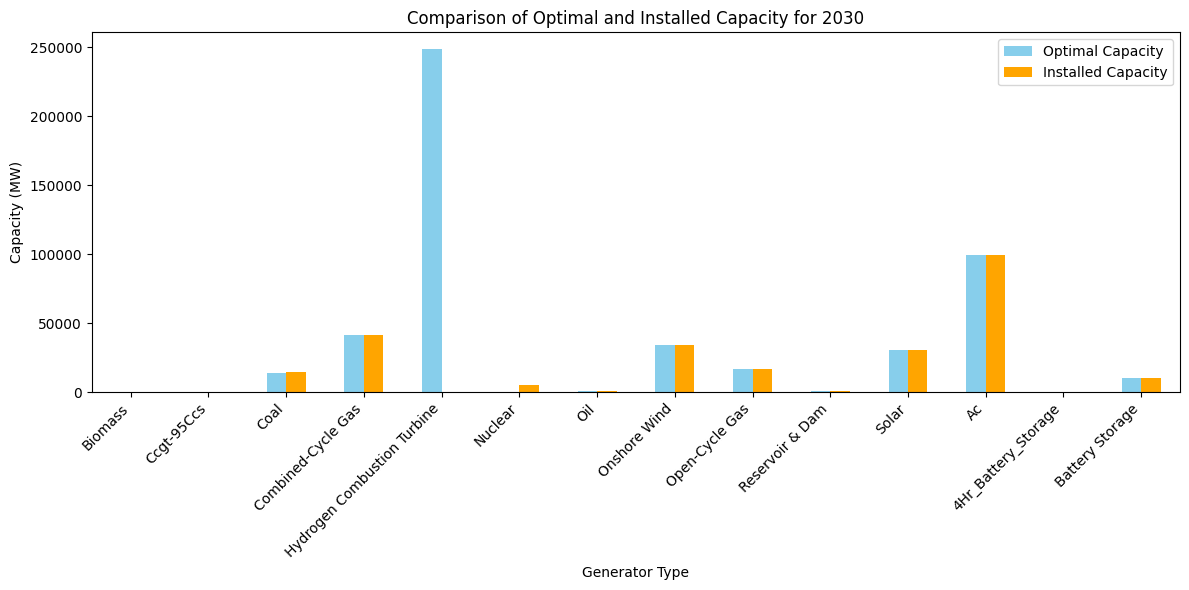

In [56]:
plot_capacity_comparison(network)

/Users/kamrantehranchi/Local_Documents/energy310_notebooks/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1800: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



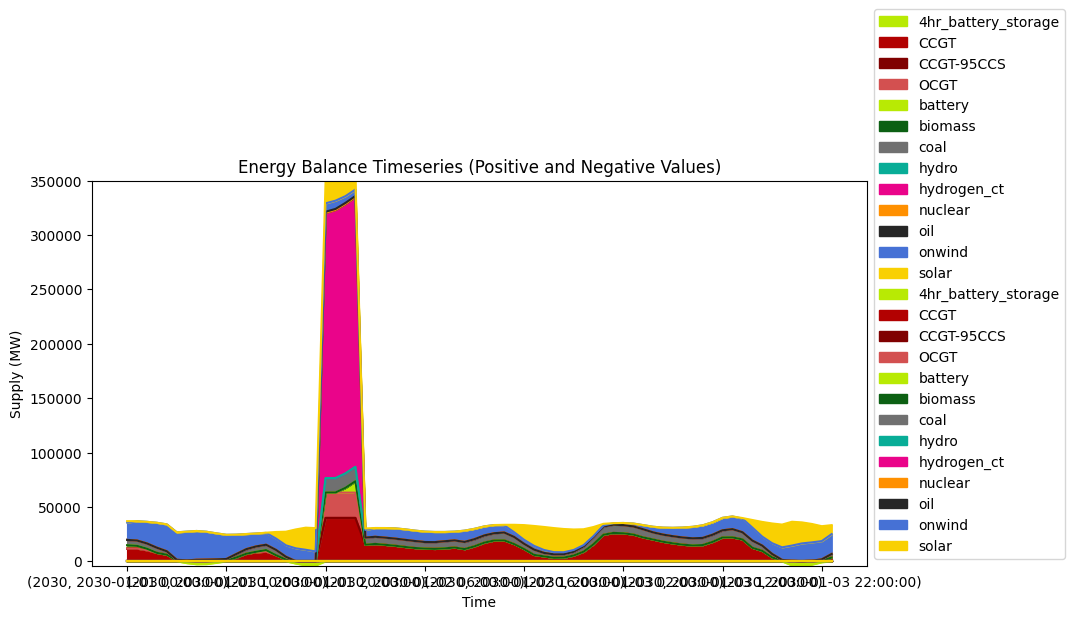

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Energy Balance Timeseries (Positive and Negative Values)'}, xlabel='Time', ylabel='Supply (MW)'>)

In [57]:
plot_energy_balance(network, 24 * 3)

#### These results should set off some alarms.... does anything look weird to you about the solution??

### Adjusting snapshot weighting

$$
\begin{aligned}
\min_{p, s, \bar{p}, \bar{s}, \bar{f}, f}
&\sum_{a \in A} \omega_a \Bigg[ 
\sum_{t \in T^a} \textcolor{red}{\omega_{a,t}} \Bigg( 
\sum_{g \in G} o_{g,a,t} \cdot p_{g,a,t} 
\Bigg) \\[0.5em]
& \quad + \sum_{g \in G} c_{g,a} \cdot \bar{p}_{g} 
+ \sum_{s \in S} c_s \cdot \bar{s}_{s} 
+ \sum_{b \in B} c_b \cdot \bar{f}_{b}
\Bigg] \\[0.5em]
\end{aligned}
$$

In [58]:
network.snapshot_weightings.iloc[0:72] = 8760/72

In [59]:
network.optimize(snapshots=network.snapshots[0:72], solver_name="gurobi")

INFO:linopy.model: Solve problem using Gurobi solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 9/9 [00:00<00:00, 35.81it/s]
INFO:linopy.io: Writing time: 2.38s


Set parameter Username
Academic license - for non-commercial use only - expires 2026-01-01
Read LP format model from file /private/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/linopy-problem-1xixp8h4.lp
Reading time = 0.49 seconds
obj: 270032 rows, 103357 columns, 562700 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (mac64[x86] - Darwin 24.6.0 24G90)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 270032 rows, 103357 columns and 562700 nonzeros
Model fingerprint: 0xb88c1fee
Coefficient statistics:
  Matrix range     [1e-03, 6e+02]
  Objective range  [1e+00, 5e+05]
  Bounds range     [5e+09, 5e+09]
  RHS range        [1e-03, 5e+07]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 143190 rows and 30872 columns
Presolve time: 0.42s
Presolved: 126842 rows, 72485 columns, 383527 nonzeros

Concurre

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 103357 primals, 270032 duals
Objective: 3.42e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Link-ext-p-lower, Link-ext-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the network.


('ok', 'optimal')

/Users/kamrantehranchi/Local_Documents/energy310_notebooks/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1800: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



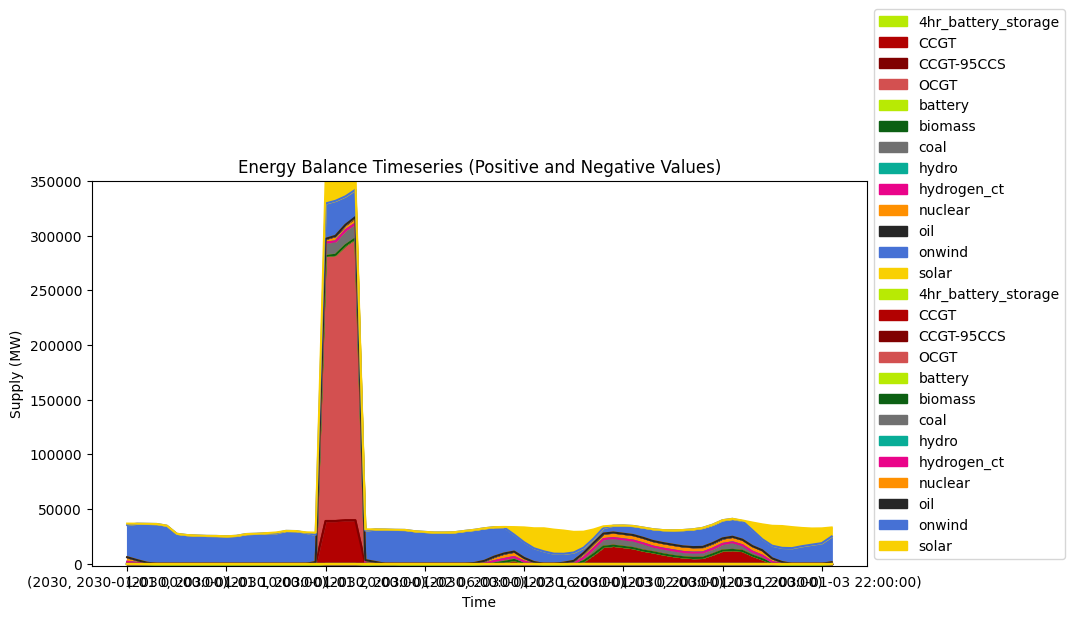

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Energy Balance Timeseries (Positive and Negative Values)'}, xlabel='Time', ylabel='Supply (MW)'>)

In [60]:
plot_energy_balance(network, 24 *3)

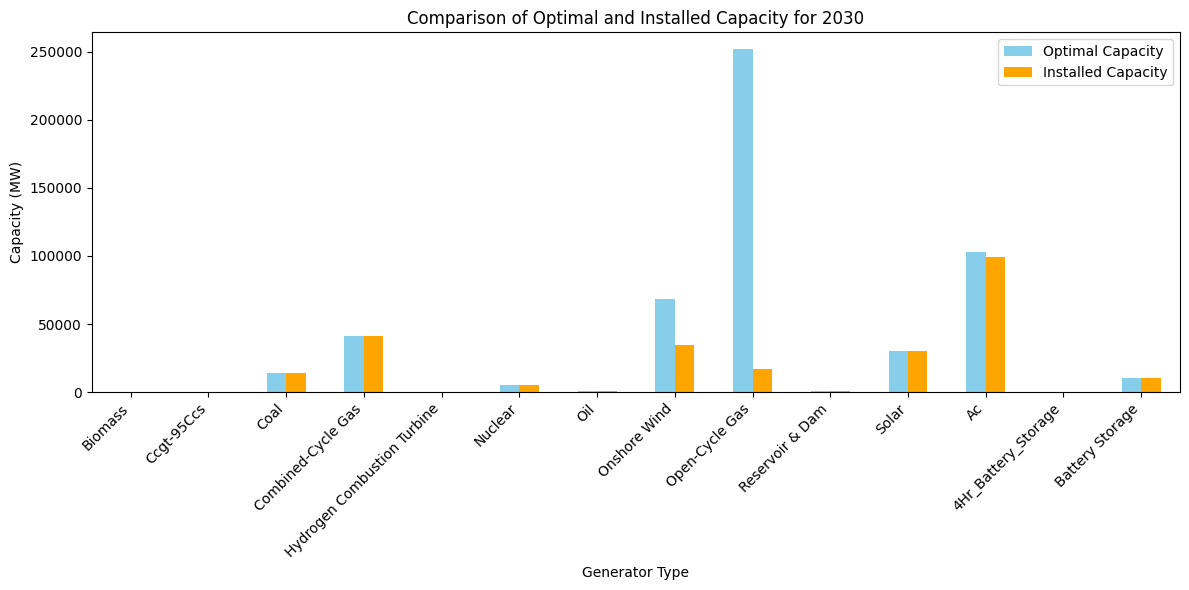

In [61]:
plot_capacity_comparison(network)